In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import torch

In [48]:
labels = pd.read_csv("D:\\cs156\\train.csv") # labels location

labels['female'] = (labels['Sex'] == 'Female').astype(int)*2 - 1
labels['frontal'] = (labels['Frontal/Lateral'] == 'Frontal').astype(int)*2 - 1
labels['AP'] = (labels['AP/PA'] == 'AP').astype(int)*2 - 1
labels_dropped = labels.drop(columns=['Unnamed: 0','Path','Sex','Frontal/Lateral','AP/PA'])
diagnoses = labels.drop(columns=['Age','female','frontal','AP','Unnamed: 0',
                                 'Path','Sex','Frontal/Lateral','AP/PA'])

In [51]:
ims = []
frontal_np = np.empty((0,200,200))
lateral_np = np.empty((0,200,200))
nsub = 0
for root, subdirs, files in os.walk("D:\\cs156"): # data location
    if len(root) < 10:
        continue
    elif len(subdirs) > 0:
        nsub = len(subdirs)
        n = 0
        patient = [[],[]]
        continue
    elif len(files) > 0:
        for fname in files:
            full_im = plt.imread(root + '\\' + fname)
            small_im = skimage.transform.resize(full_im, (200,200), order=1,
                                                mode='edge', clip=True, preserve_range=True,
                                                anti_aliasing=True, anti_aliasing_sigma=True)
            if '2' in fname:
                patient[1].append(small_im)
                lateral_np = np.concatenate((lateral_np, small_im.reshape((1,200,200))))
            else:
                patient[0].append(small_im)
                frontal_np = np.concatenate((frontal_np, small_im.reshape((1,200,200))))
        n += 1
        if n < nsub:
            continue
    ims.append(patient)

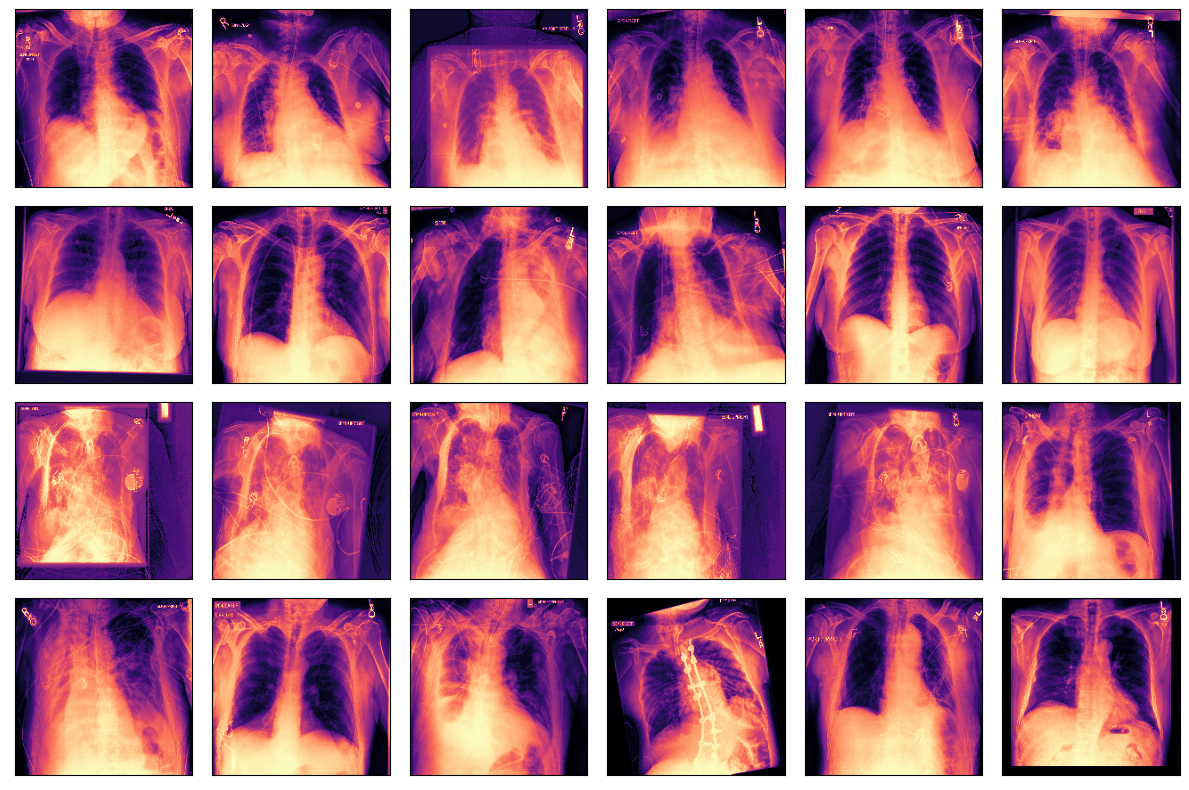

In [102]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(4,6,1)
plt.imshow(frontal_np[0], cmap='magma')
plt.xticks([])
plt.yticks([])
for i, im in enumerate(range(1, frontal_np.shape[0], 3)):
    fig.add_subplot(4,6,i+2)
    plt.imshow(frontal_np[im], cmap='magma')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

In [94]:
print(len(range(-2, frontal_np.shape[0], 3)))
for i in range(-2, frontal_np.shape[0], 3):
    print(i)

24
-2
1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67


In [105]:
print('/')

/


In [110]:
os.path.join(root,fname[:-4])

'D:\\cs156\\pid00020\\study1\\view2_lateral'